In [1]:
import ants
import nilearn
from nilearn import image
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
import os
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
import shutil
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

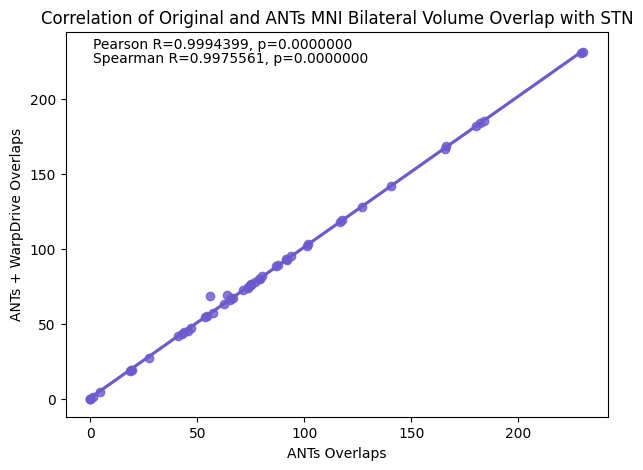

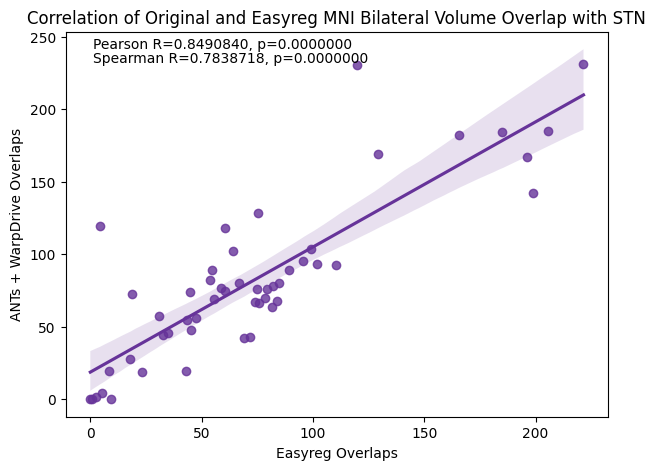

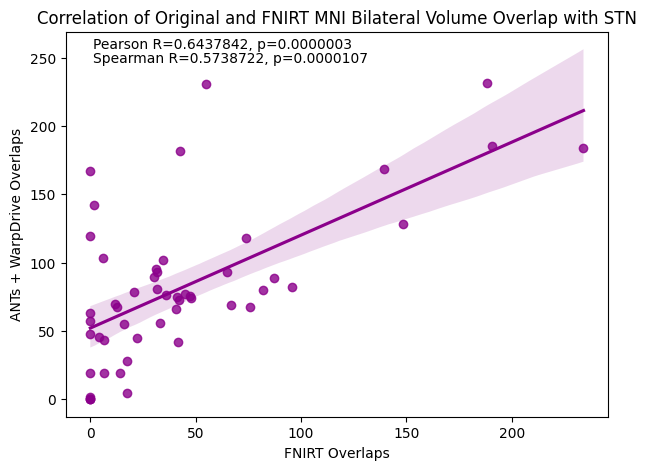

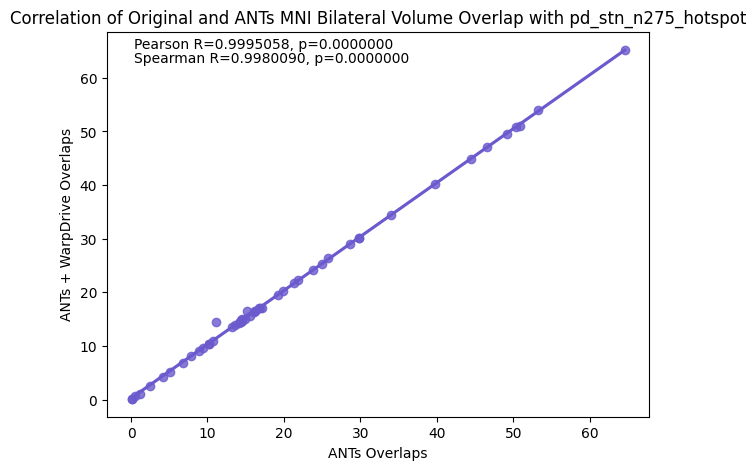

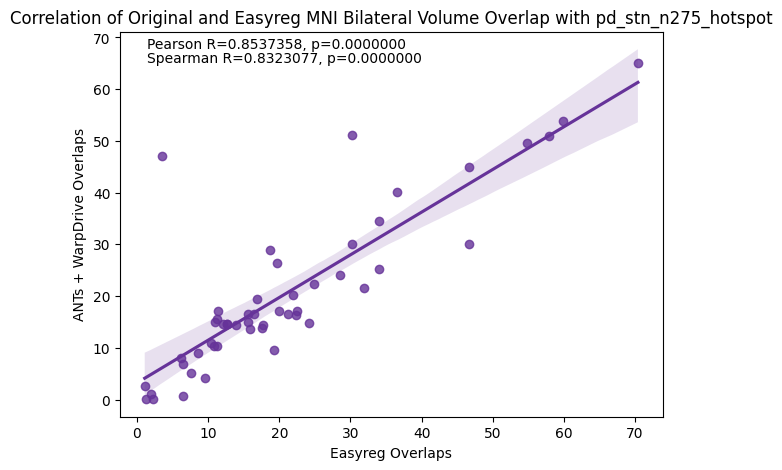

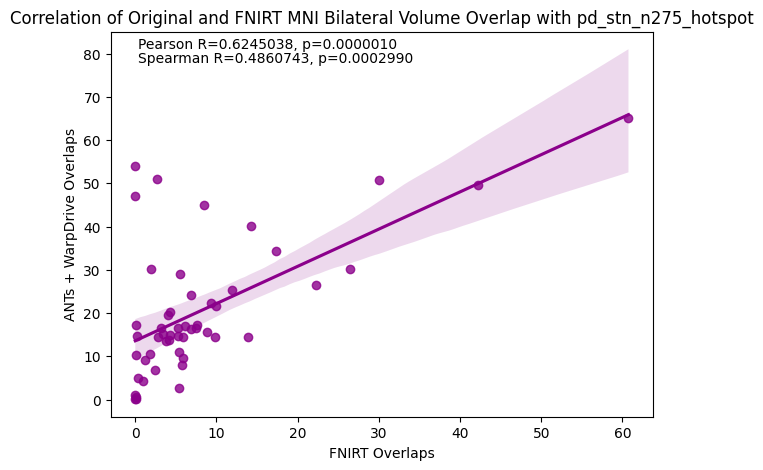

In [5]:
#correlate norm approaches and original overlaps together- berlin51
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/CSV/OSS-DBS_Volume_Overlaps_NormTypes_MNI.csv')
df = df.dropna()
regions = ['STN','pd_stn_n275_hotspot']
norms = ['ANTs','Easyreg','FNIRT']
colors = ['slateblue','rebeccapurple','darkmagenta']
color_index = 0

def r_p(vol_overlap_col,region):
    pearson_r, pearson_p = pearsonr(df[f'OG_{region}_MNI_Overlap_BI_MM'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df[f'OG_{region}_MNI_Overlap_BI_MM'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

def plot_analysis(x_data, title, region, norms, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df[f'OG_{region}_MNI_Overlap_BI_MM'], color=color)
    plt.title(title)
    plt.xlabel(f'{norms} Overlaps')
    plt.ylabel('ANTs + WarpDrive Overlaps')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()
    
for r in regions:
    for n in norms:
        c = colors[color_index % len(colors)]
        mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p = r_p(f'{n}_{r}_MNI_Overlap_BI_MM',r)
        plot_analysis(df[f'{n}_{r}_MNI_Overlap_BI_MM'],f'Correlation of Original and {n} MNI Bilateral Volume Overlap with {r}',r,n,mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p,c,f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/NormalizationTypesCorrelations/{n}&Original Volume Overlap with {r}.png')
        color_index += 1

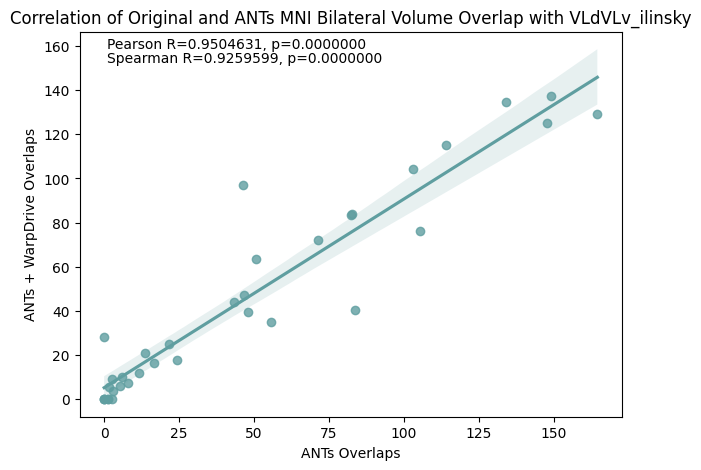

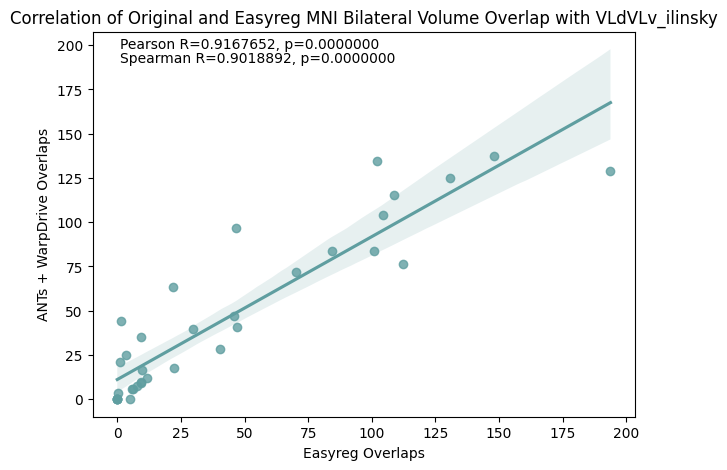

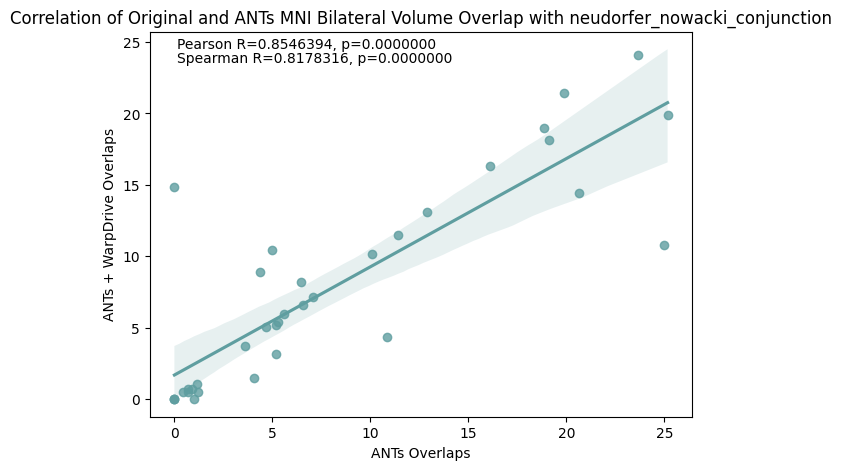

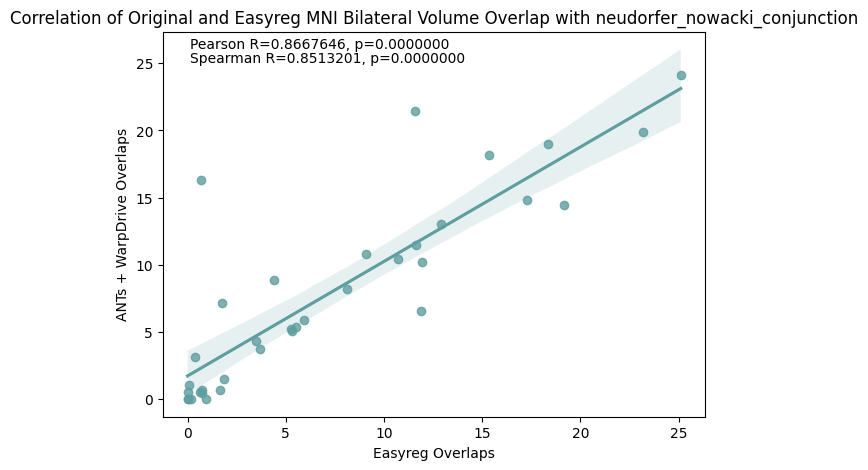

In [23]:
#correlate norm approaches and original overlaps together- essential tremor
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/OSS-DBS_NormTypes_Volume_Overlaps.csv')
df = df.dropna()
regions = ['VLdVLv_ilinsky','neudorfer_nowacki_conjunction']
#norms = ['ANTs','Easyreg','FNIRT']
norms = ['ANTs','Easyreg']

def r_p(vol_overlap_col,region):
    pearson_r, pearson_p = pearsonr(df[f'OG_{region}_MNI_Overlap_BI_MM'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df[f'OG_{region}_MNI_Overlap_BI_MM'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

def plot_analysis(x_data, title, region, norms, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df[f'OG_{region}_MNI_Overlap_BI_MM'], color=color)
    plt.title(title)
    plt.xlabel(f'{norms} Overlaps')
    plt.ylabel('ANTs + WarpDrive Overlaps')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()
    
for r in regions:
    for n in norms:
        mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p = r_p(f'{n}_{r}_MNI_Overlap_BI_MM',r)
        plot_analysis(df[f'{n}_{r}_MNI_Overlap_BI_MM'],f'Correlation of Original and {n} MNI Bilateral Volume Overlap with {r}',r,n,mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p,'cadetblue',f'/Volumes/Cingulate/NativeMNI_Overlaps/EssentialTremor/Figures/OSS-DBS/NormalizationTypesCorrelations/{n}&Original Volume Overlap with {r}.png')

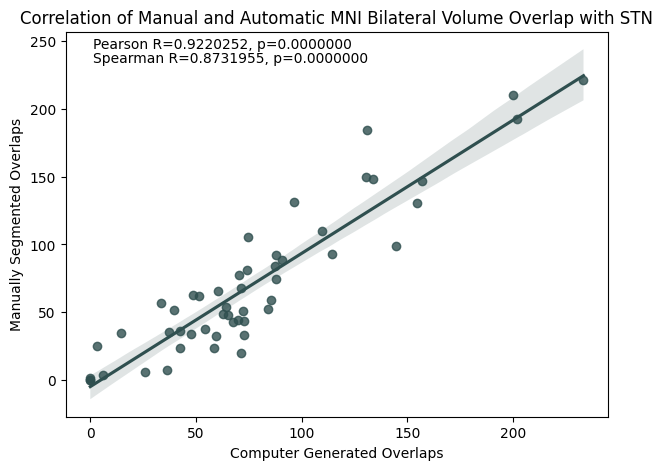

In [7]:
#correlate manual and auto STNs segmentation overlaps together
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/CSV/OSS-DBS_Volume_Overlaps_STN_Native.csv')
df = df.dropna()
regions = ['STN']

def r_p(vol_overlap_col):
    pearson_r, pearson_p = pearsonr(df[f'STN_Manual_Native_Overlap_BI_MM'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df[f'STN_Manual_Native_Overlap_BI_MM'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

def plot_analysis(x_data, title, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df[f'STN_Manual_Native_Overlap_BI_MM'], color=color)
    plt.title(title)
    plt.xlabel('Computer Generated Overlaps')
    plt.ylabel('Manually Segmented Overlaps')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()
    
for r in regions:
    mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p = r_p(f'STN_Computer_Native_Overlap_BI_MM')
    plot_analysis(df[f'STN_Computer_Native_Overlap_BI_MM'],f'Correlation of Manual and Automatic MNI Bilateral Volume Overlap with {r}',mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p,'darkslategrey',f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/NormalizationTypesCorrelations/Manual and Automatic Volume Overlap with {r}.png')

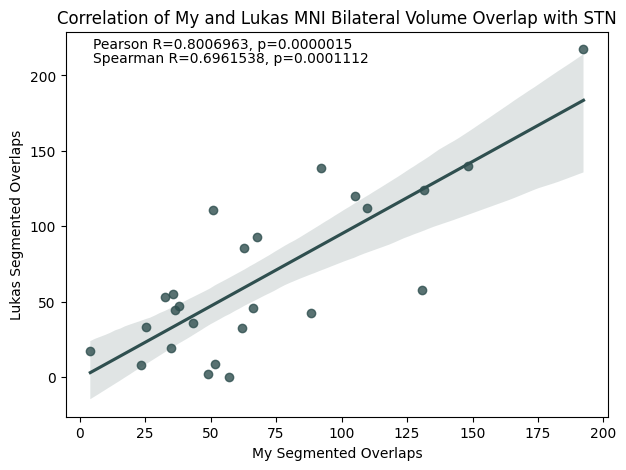

In [10]:
#correlate my and lukas' STNs segmentation overlaps together
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/CSV/OSS-DBS_Volume_Overlaps_STN_Native1-25.csv')
df = df.dropna()
regions = ['STN']

def r_p(vol_overlap_col):
    pearson_r, pearson_p = pearsonr(df[f'STN_Lukas_Native_Overlap_BI_MM'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df[f'STN_Lukas_Native_Overlap_BI_MM'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

def plot_analysis(x_data, title, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df[f'STN_Lukas_Native_Overlap_BI_MM'], color=color)
    plt.title(title)
    plt.xlabel('My Segmented Overlaps')
    plt.ylabel('Lukas Segmented Overlaps')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()
    
for r in regions:
    mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p = r_p(f'STN_Manual_Native_Overlap_BI_MM')
    plot_analysis(df[f'STN_Manual_Native_Overlap_BI_MM'],f'Correlation of My and Lukas MNI Bilateral Volume Overlap with {r}',mni_pearson_r,mni_pearson_p,mni_spearman_r,mni_spearman_p,'darkslategrey',f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/OSS-DBS/NormalizationTypesCorrelations/My and Lukas Volume Overlap with {r}.png')

In [4]:
#dice with my STNs and computer generated STNs
directory = [i for i in os.listdir('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS') if i.startswith('sub')]

sub_ids = []
dicey = []

def combine(lh,rh):
    bi = math_img('img1+img2',img1=lh,img2=rh)
    bi = bi.get_fdata()
    return bi

def dice_coefficient(image1, image2):
    image1 = image1.flatten()
    image2 = image2.flatten()
    
    intersection = np.sum(image1 * image2)
    return 2. * intersection / (np.sum(image1) + np.sum(image2))

for i in directory:
    sub_ids.append(i)
    auto_lh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS/{i}/{i}_STN_lh_native_output.nii')
    auto_rh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS/{i}/{i}_STN_rh_native_output.nii')

    auto_bi = combine(auto_lh,auto_rh)

    manual = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/STNs/NativeSTNs/{i}.nii.gz').get_fdata()

    manual = manual.astype(np.float32)
    auto_bi = auto_bi.astype(np.float32)

    dice = dice_coefficient(manual, auto_bi)
    dicey.append(dice)
    print(f"Dice coefficient for {i}: {dice}")
    
df = pd.DataFrame(
    {'ID':sub_ids,
    'Dice_Coefficient':dicey
})
df.to_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/redoDice4Auto&ManualSTNs.csv',index=False)

Dice coefficient for sub-BER001: 0.6084848484848485
Dice coefficient for sub-BER002: 0.5663127212159067
Dice coefficient for sub-BER003: 0.6335754640839386
Dice coefficient for sub-BER004: 0.5495551417339127
Dice coefficient for sub-BER005: 0.6117159149818558
Dice coefficient for sub-BER006: 0.5577536694320357
Dice coefficient for sub-BER007: 0.603372891942536
Dice coefficient for sub-BER008: 0.6637246248896734
Dice coefficient for sub-BER009: 0.6123013130615066
Dice coefficient for sub-BER010: 0.5657894736842105
Dice coefficient for sub-BER011: 0.6454431960049938
Dice coefficient for sub-BER012: 0.5606608156943728
Dice coefficient for sub-BER013: 0.609713282621416
Dice coefficient for sub-BER014: 0.5358024691358024
Dice coefficient for sub-BER015: 0.6775293671845396
Dice coefficient for sub-BER016: 0.6072289156626506
Dice coefficient for sub-BER017: 0.7034076567101388
Dice coefficient for sub-BER018: 0.6801218583396801
Dice coefficient for sub-BER019: 0.5509893455098934
Dice coefficie

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_22987/2079318350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=df['Dice_Coefficient'], palette="OrRd")


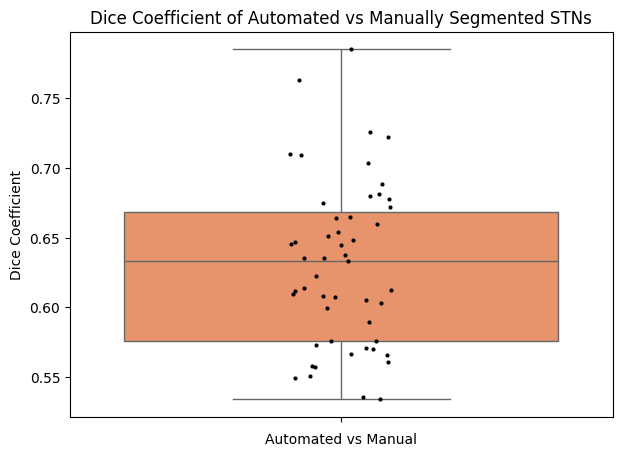

In [5]:
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Dice4Auto&ManualSTNs.csv')

plt.figure(figsize=(7, 5))
ax = sns.stripplot(y=df['Dice_Coefficient'], s=3,color='black')
ax = sns.boxplot(y=df['Dice_Coefficient'], palette="OrRd")
plt.title('Dice Coefficient of Automated vs Manually Segmented STNs')
plt.ylabel('Dice Coefficient')
plt.xlabel('Automated vs Manual')
plt.show()

In [12]:
i = 'sub-BER005'
img_nifti_lh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/STNs/NativeSTNs/{i}.nii.gz')
img_nifti_rh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/STNs/NativeSTNs/{i}.nii.gz')
nifti_array_LH = img_nifti_lh.get_fdata()
nifti_array_RH = img_nifti_rh.get_fdata()
nifti_array_LH[258:511,:,:]=0
nifti_array_RH[0:257,:,:]=0
new_image_LH = nib.Nifti1Image(nifti_array_LH, affine=img_nifti_lh.affine)
new_image_RH = nib.Nifti1Image(nifti_array_RH, affine=img_nifti_rh.affine)
nib.save(new_image_RH,f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/STNs/Hemispheres/Me/{i}_lh.nii')
nib.save(new_image_LH,f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/STNs/Hemispheres/Me/{i}_rh.nii')

In [18]:
#dice with Lukas and auto STNs
directory = [i for i in os.listdir('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS') if i.startswith('sub-BER00') or i.startswith('sub-BER01') or i.startswith('sub-BER020') or i.startswith('sub-BER021')or i.startswith('sub-BER022') or i.startswith('sub-BER023') or i.startswith('sub-BER024') or i.startswith('sub-BER025')]

sub_ids = []
dicey_lh = []
dicey_rh = []

def dice_coefficient(image1, image2):
    image1 = image1.flatten()
    image2 = image2.flatten()
    
    intersection = np.sum(image1 * image2)
    return 2. * intersection / (np.sum(image1) + np.sum(image2))

for i in directory:
    sub_ids.append(i)
    lukas_lh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/STNs/Hemispheres/Me/{i}_lh.nii.gz').get_fdata()
    lukas_rh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/STNs/Hemispheres/Me/{i}_rh.nii.gz').get_fdata()
    manual_lh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS/{i}/{i}_STN_lh_native_output.nii').get_fdata()
    manual_rh = nib.load(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/OSS-DBS/{i}/{i}_STN_rh_native_output.nii').get_fdata()
    
    manual_lh = manual_lh.astype(np.float32)
    lukas_lh = lukas_lh.astype(np.float32)
    manual_rh = manual_rh.astype(np.float32)
    lukas_rh = lukas_rh.astype(np.float32)

    dice_lh = dice_coefficient(manual_lh, lukas_lh)
    dicey_lh.append(dice_lh)
    print(f"Dice coefficient for {i} LH: {dice_lh}")
    
    dice_rh = dice_coefficient(manual_rh, lukas_rh)
    dicey_rh.append(dice_rh)
    print(f"Dice coefficient for {i} RH: {dice_rh}")
    
df = pd.DataFrame(
    {'ID':sub_ids,
    'Dice_Coefficient_LH':dicey_lh,
    'Dice_Coefficient_RH':dicey_rh
})
df.to_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Dice4MeAutoBIAutoSTNs.csv',index=False)

Dice coefficient for sub-BER001 LH: 0.5288461538461539
Dice coefficient for sub-BER001 RH: 0.6894865525672371
Dice coefficient for sub-BER002 LH: 0.5574572127139364
Dice coefficient for sub-BER002 RH: 0.5755640698169434
Dice coefficient for sub-BER003 LH: 0.6706792777300086
Dice coefficient for sub-BER003 RH: 0.6007604562737643
Dice coefficient for sub-BER004 LH: 0.0
Dice coefficient for sub-BER004 RH: 0.0
Dice coefficient for sub-BER005 LH: 0.6241345202769535
Dice coefficient for sub-BER005 RH: 0.5980392156862745
Dice coefficient for sub-BER006 LH: 0.0
Dice coefficient for sub-BER006 RH: 0.0
Dice coefficient for sub-BER007 LH: 0.5880861850443599
Dice coefficient for sub-BER007 RH: 0.6182266009852216
Dice coefficient for sub-BER008 LH: 0.6957033549146556
Dice coefficient for sub-BER008 RH: 0.6317647058823529
Dice coefficient for sub-BER009 LH: 0.6105834464043419
Dice coefficient for sub-BER009 RH: 0.6140845070422535
Dice coefficient for sub-BER010 LH: 0.5669409124906507
Dice coefficien

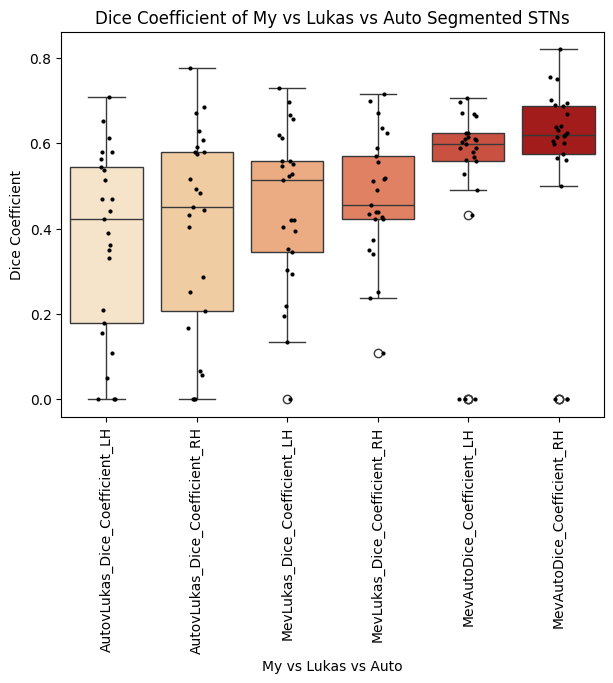

In [23]:
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Dice4MeLukasAutoSTNs.csv')

plt.figure(figsize=(7, 5))
ax = sns.stripplot(data=[df['AutovLukas_Dice_Coefficient_LH'],df['AutovLukas_Dice_Coefficient_RH'],df['MevLukas_Dice_Coefficient_LH'],df['MevLukas_Dice_Coefficient_RH'],df['MevAutoDice_Coefficient_LH'],df['MevAutoDice_Coefficient_RH']], s=3,color='black')
ax = sns.boxplot(data=[df['AutovLukas_Dice_Coefficient_LH'],df['AutovLukas_Dice_Coefficient_RH'],df['MevLukas_Dice_Coefficient_LH'],df['MevLukas_Dice_Coefficient_RH'],df['MevAutoDice_Coefficient_LH'],df['MevAutoDice_Coefficient_RH']], palette="OrRd")
plt.title('Dice Coefficient of My vs Lukas vs Auto Segmented STNs')
plt.ylabel('Dice Coefficient')
plt.xlabel('My vs Lukas vs Auto')
ax.tick_params(axis='x', rotation=90)
plt.show()